<a href="https://colab.research.google.com/github/Gabriel-Lamprea/Proyecto-final/blob/main/Proyecto_Final_Gabriel_Lamprea.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Proyecto Final**
Curso de Programación Estadística con Python

Estudiante: Gabriel Eduardo Lamprea Mora

## **Avance 1:Exploración y visualización de datos**

In [ ]:
#Importando las librerías que seran de utilidad para el desarrollo del proyecto final
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statistics
from scipy.stats import shapiro
from scipy.stats import norm
from sklearn import linear_model #Modelo
from sklearn.model_selection import train_test_split #Evaluación
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
#Importando la base
df=pd.read_csv('sample_data/WineQuality_Red.csv')
df.head(4) # Visualizando los primeros cuatro renglones de la base


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6


In [ ]:
#Obtener info de las variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
#Realizando un análisis descriptivo de la base de datos
#Promedio para todas las variables(haciendo uso de pandas)
average=round(df.mean(),2)
average



fixed acidity            8.32
volatile acidity         0.53
citric acid              0.27
residual sugar           2.54
chlorides                0.09
free sulfur dioxide     15.87
total sulfur dioxide    46.47
density                  1.00
pH                       3.31
sulphates                0.66
alcohol                 10.42
quality                  5.64
dtype: float64

In [ ]:
#Desviación estándar para todas las variables(haciendo uso de pandas)
std=round(df.std(),2)
std

fixed acidity            1.74
volatile acidity         0.18
citric acid              0.19
residual sugar           1.41
chlorides                0.05
free sulfur dioxide     10.46
total sulfur dioxide    32.90
density                  0.00
pH                       0.15
sulphates                0.17
alcohol                  1.07
quality                  0.81
dtype: float64

In [ ]:
#Mediana para todas las variables(haciendo uso de pandas)
median=round(df.median(),2)
median

fixed acidity            7.90
volatile acidity         0.52
citric acid              0.26
residual sugar           2.20
chlorides                0.08
free sulfur dioxide     14.00
total sulfur dioxide    38.00
density                  1.00
pH                       3.31
sulphates                0.62
alcohol                 10.20
quality                  6.00
dtype: float64

In [ ]:
#Percentil 75% para todas las variables(haciendo uso de pandas)
round(df.quantile(0.75),2)


fixed acidity            9.20
volatile acidity         0.64
citric acid              0.42
residual sugar           2.60
chlorides                0.09
free sulfur dioxide     21.00
total sulfur dioxide    62.00
density                  1.00
pH                       3.40
sulphates                0.73
alcohol                 11.10
quality                  6.00
Name: 0.75, dtype: float64

In [ ]:
#Moda para todas las variables(haciendo uso de pandas)
df.mode()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.2,0.6,0.0,2.0,0.08,6.0,28.0,0.9972,3.3,0.6,9.5,5


In [ ]:
#Resumiendo lo anterior, gracias a la metrica describe :
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


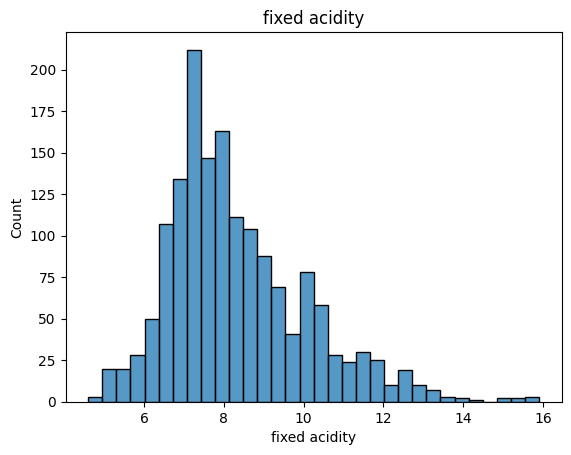

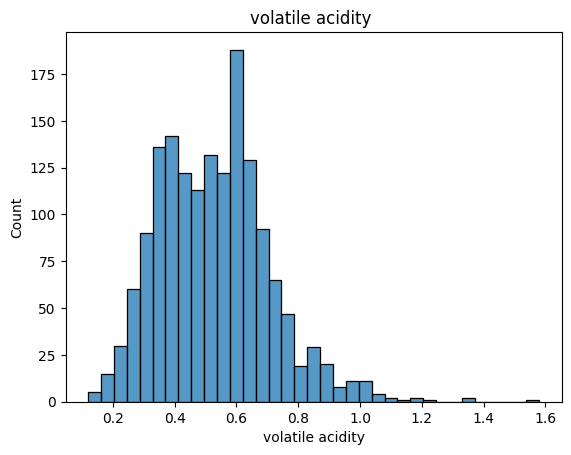

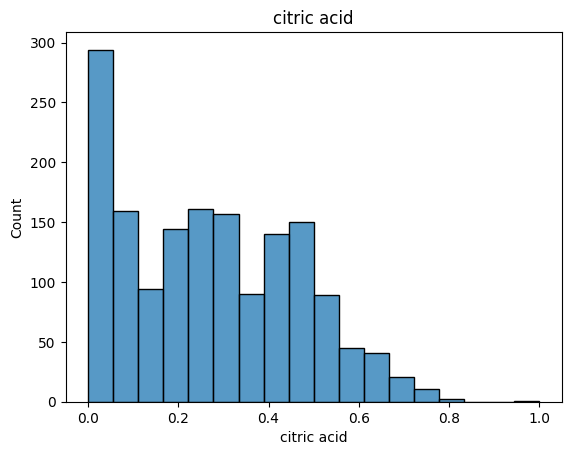

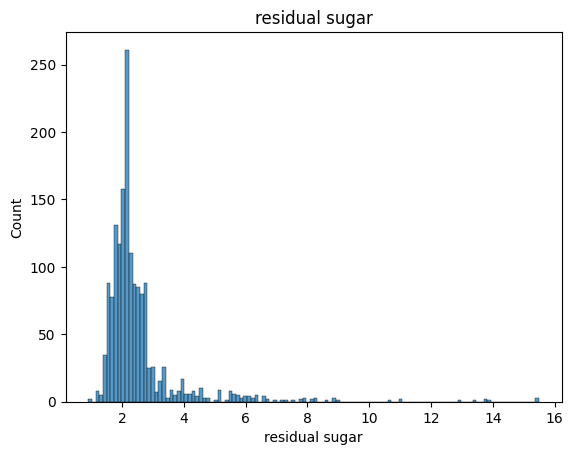

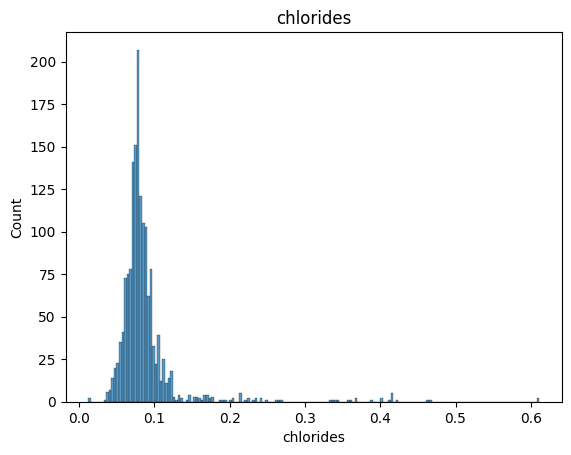

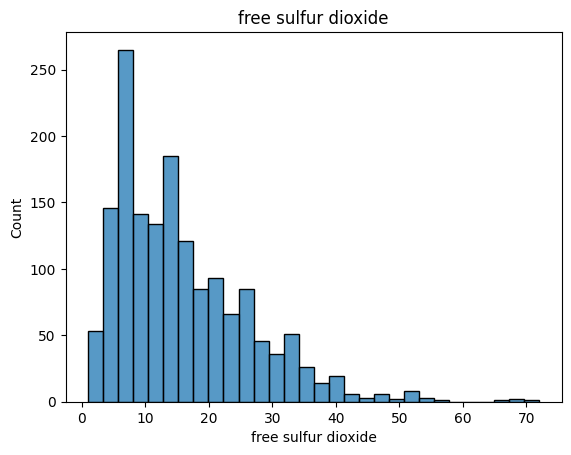

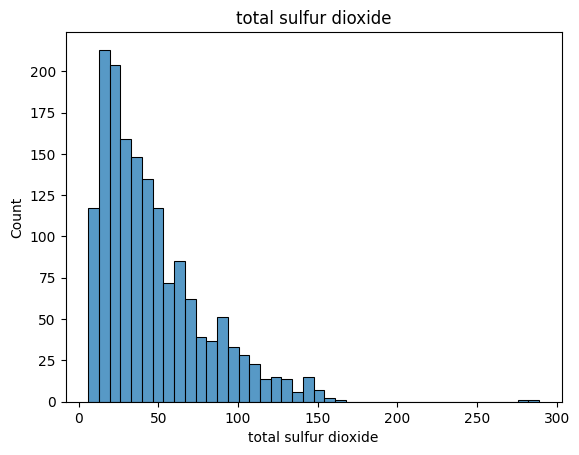

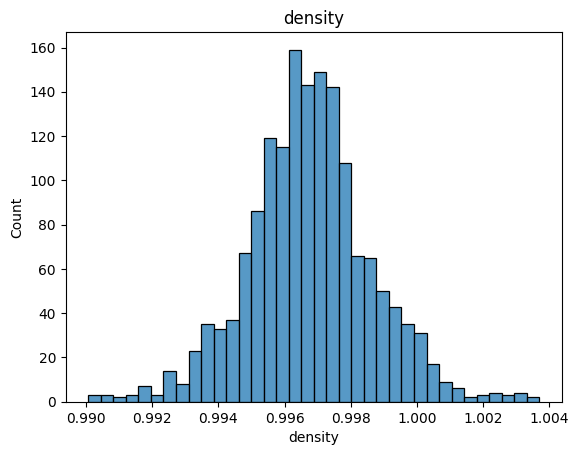

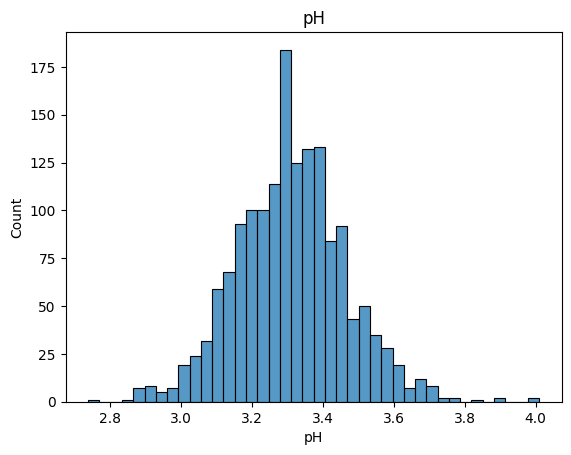

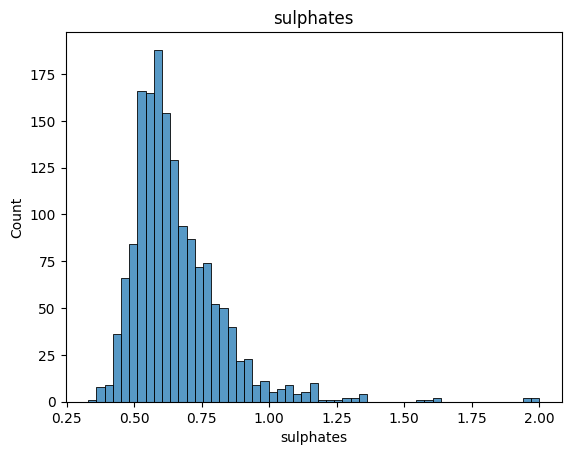

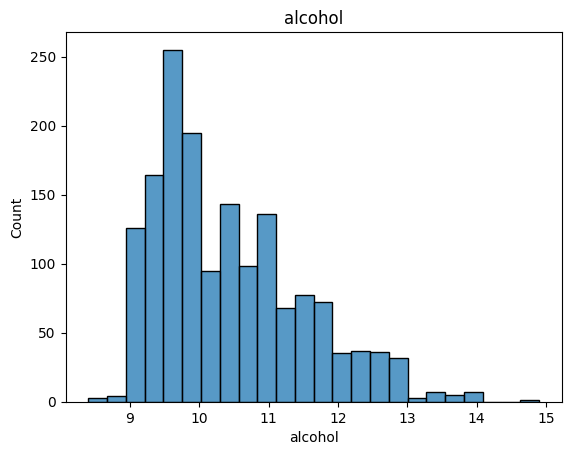

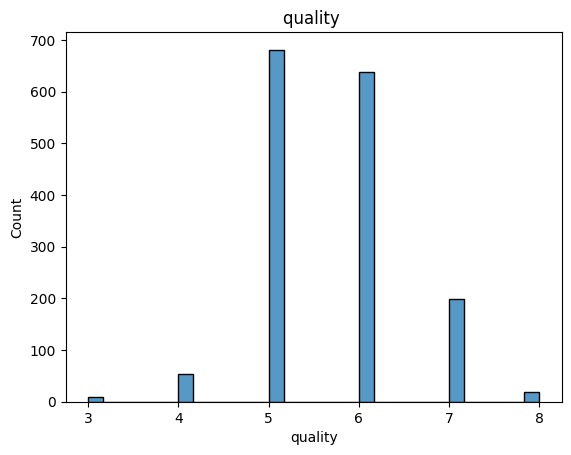

In [ ]:
#Creación de histogramas para cada una de las variables
sns.histplot(df['fixed acidity'])
plt.title('fixed acidity')
plt.show()

sns.histplot(df['volatile acidity'])
plt.title('volatile acidity ')
plt.show()

sns.histplot(df['citric acid'])
plt.title('citric acid')
plt.show()

sns.histplot(df['residual sugar'])
plt.title('residual sugar')
plt.show()

sns.histplot(df['chlorides'])
plt.title('chlorides')
plt.show()

sns.histplot(df['free sulfur dioxide'])
plt.title('free sulfur dioxide')
plt.show()

sns.histplot(df['total sulfur dioxide'])
plt.title('total sulfur dioxide')
plt.show()

sns.histplot(df['density'])
plt.title('density')
plt.show()

sns.histplot(df['pH'])
plt.title('pH')
plt.show()

sns.histplot(df['sulphates'])
plt.title('sulphates')
plt.show()

sns.histplot(df['alcohol'])
plt.title('alcohol')
plt.show()

sns.histplot(df['quality'])
plt.title('quality ')
plt.show()


La forma que tiene el histograma de la variable pH , es de forma de campana ,donde podemos observar que la mayor cantidad del pH se reune alrededor de 3.3. Lo anterior nos puede dar una idea de que la variable pH presenta una distribución normal.

## **Avance 2: Pruebas de Hipótesis y Probabilidades**

Vamos a comprobar si los datos extraídos para la variable pH para la muestra de calidad del
vino tinto provienen de una distribución normal , esto mediante el test de normalidad de 
Shapiro-Wilk, bajo un nivel de significancia de alpha 0.05 y bajo el supuesto de que las observaciones de
cada muestra son independientes e idénticamente distribuidas


Establecemos las hipótesis

Ho: La distribución es normal

H1: La distribución no es normal

In [ ]:
#Test de Normalidad Shapiro-Wilk
data=df['pH']
stat,p=shapiro(data)
print(f'stat={round(stat,3)},p={round(p,6)}')


stat=0.993,p=2e-06


In [ ]:
if p > 0.05:
	print('Distribución Normal')
else:
	print('Distribución NO Normal')

Distribución NO Normal


Como el p-value < 0.05 **se rechaza la hipótesis nula**,al rechazar la hipótesis nula se puede decir que los datos no tienen una distribucion normal.

Vale la pena aclarar que en la práctica, para este test, si para un conjunto de datos SE rechaza la hipótesis nula, habría que verificar inicialmente la forma de su histograma, el cual a simple vista parece indicar una distribucion normal y que el valor de la media y mediana son bastante similares, en este caso 3.31. Ya que puede deberse que la muestra no sea significativa debido a que son muy pocos datos, lo que significa que no es concluyente el rechazo en su totalidad para este test en muestras pequeñas, como podría ser este caso.


In [ ]:
import scipy.stats as stats
data = df
alpha = 0.05
mean=data['pH'].mean()
print(round(mean,2))
std=data['pH'].std()
print(round(std,2))
kstest_result = stats.kstest(data['pH'], 'norm', args=(mean, std))
kstest_result

3.31
0.15


KstestResult(statistic=0.04036845419707158, pvalue=0.010604884802448568, statistic_location=3.4, statistic_sign=1)

In [ ]:
# Comprobar si se rechaza o no la hipótesis nula
if kstest_result[1] < alpha:
    print("Los datos no siguen una distribución normal")
else:
    print("Los datos siguen una distribución normal")

Los datos no siguen una distribución normal


Graficando un QQ-plot mediante la función probplot() del módulo scipy.stats para visualizar de manera práctica si la distribución del pH sigue una
distribución normal,si los datos se ajustan a una distribución normal. Si los datos se ajustan a una distribución normal, los puntos en el gráfico deben estar aproximadamente en una línea recta, **como es el caso en este ejercicio:**

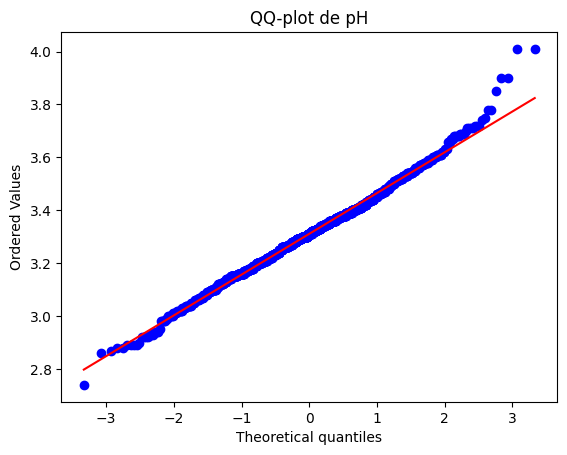

In [ ]:
from scipy.stats import probplot
import matplotlib.pyplot as plt

probplot(df['pH'], plot=plt)
plt.title("QQ-plot de pH")
plt.show()


Es complicado decir que los datos del pH proviene de una distribución normal, ya que como se vio en el desarrollo , la **media y mediana son iguales** con un valor de 3.31, lo cual indica que los datos tienen una distribución simétrica,En otras palabras, hay una distribución equilibrada de datos a ambos lados de la media/mediana, lo que indica que los valores extremos o atípicos son poco comunes o están equilibrados en ambos lados de la distribución.Sin embargo, es importante tener en cuenta que la igualdad entre la media y la mediana no garantiza necesariamente que los datos sigan una distribución normal, como lo mostro el **test de Shapiro-Wilk**, y graficando el Q-Q plot vemos que los datos se ajustan a una distribución normal, ya que los puntos en el gráfico estan aproximadamente en una línea recta.

### **Estandarización**

In [ ]:
#Estandarizando la variable alcohol y dibujan su histograma con 20 bins.
#Para lo anterior primero debemos calcular la media y desviación estandar de la variable

alcohol_avg=round(df['alcohol'].mean(),2)
alcohol_std=round(df['alcohol'].std(),2)
print(f'Promedio:{alcohol_avg},Desviación estándar:{alcohol_std}')


Promedio:10.42,Desviación estándar:1.07


<Axes: xlabel='alcohol_estandarizada', ylabel='Count'>

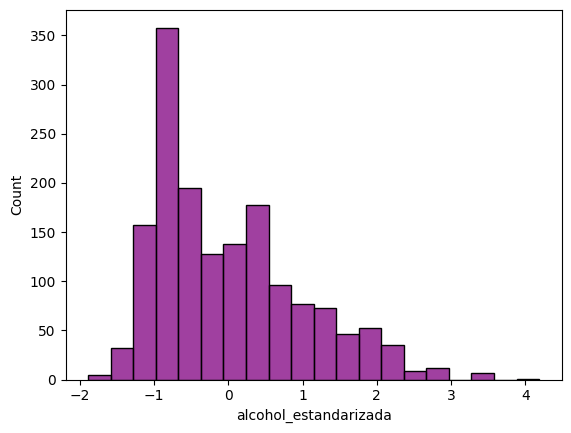

In [ ]:
#Alcohol estandarizado y dibujo de su histograma
df['alcohol_estandarizada']=(df['alcohol']-alcohol_avg)/alcohol_std
sns.histplot(df['alcohol_estandarizada'],bins=20,color='purple')

In [ ]:
#¿Cuál es la probabilidad de obtener un nivel de alcohol menor a 10 en la base de datos?:
import scipy.stats
prob=scipy.stats.norm.cdf((10-alcohol_avg)/alcohol_std) # Área bajo la curva de obtener nivel de alcohol < 10
print(round(prob,4))   #(1-prob) en caso de que se necesite probabilidad de obtener nivel de alcohol >10

0.3473


De los niveles de alcohol,tomando como referencia la probabilidad anterior puedo concluir que es más probable tomar un vino que contenga un nivel de alcohol mayor a 10(65.27% de probabilidad) , que un vino que contenga un nivel de alcohol menor a 10(34.73% de probabilidad).

# **Avance 3: Regresión lineal simple**

In [ ]:
#Vamos a determinar la correlación de todas las variables de la base de datos, con respecto 
#a la calidad del vino , para que aquella variable con mayor correlación sea la variable
#explicativa en nuestro modelo de regresión lineal
df.corr()['quality'].sort_values()

volatile acidity        -0.390558
total sulfur dioxide    -0.185100
density                 -0.174919
chlorides               -0.128907
pH                      -0.057731
free sulfur dioxide     -0.050656
residual sugar           0.013732
fixed acidity            0.124052
citric acid              0.226373
sulphates                0.251397
alcohol_estandarizada    0.476166
alcohol                  0.476166
quality                  1.000000
Name: quality, dtype: float64

Al analizar los resultados, se observa que la variable que tiene mayor correlación con la calidad del vino es el alcohol(nivel),por lo que esta será nuestra variable explicativa y la calidad nuestra variable respuesta.

(8.0, 15.225)

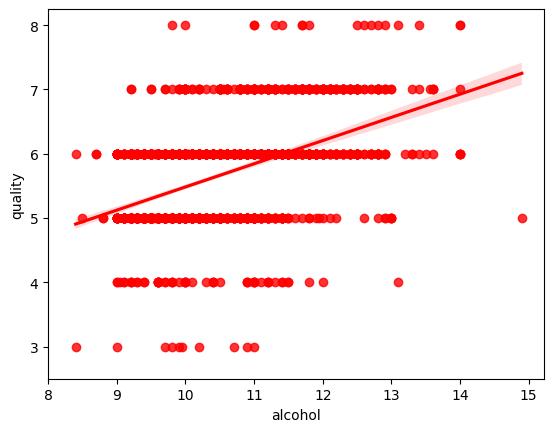

In [ ]:
#Regplot:Grafica los datos y ajusta un modelo de regresión lineal
sns.regplot(x='alcohol',y='quality',data=df,color='red')
plt.ylim(2.5,)
plt.xlim(8,)

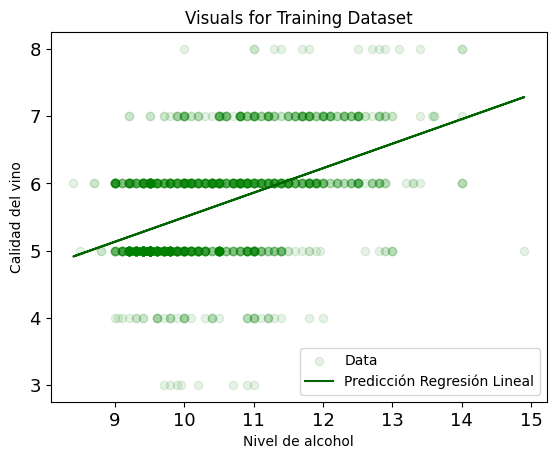

In [ ]:
#Vamos a ver que tan bueno es nuestro modelo para esto:
nivel_alcohol = df['alcohol']
calidad = df['quality']

x = np.array(nivel_alcohol).reshape(-1, 1)
y = np.array(calidad)

# Separando la base en Train and Test(entrenamiento y validación)
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.20, random_state=0)


# Ajustar un modelo de regresión lineal a la Muestra de Entrenamiento
from sklearn.linear_model import LinearRegression 
lr = LinearRegression()
lr.fit(xtrain, ytrain)

# Prediciendo los precios...
pred = lr.predict(xtest) #

# Visualizando los Resultados de Entrenamiento
plt.scatter( xtrain, ytrain, color= 'green', label="Data", alpha=.1)
plt.plot(xtrain, lr.predict(xtrain), color = 'darkgreen', label="Predicción Regresión Lineal")
plt.title ("Visuals for Training Dataset")
plt.xlabel("Nivel de alcohol")
plt.ylabel("Calidad del vino")

plt.xticks(fontsize=13) #Establece tamaño para las etiquetas del eje x
plt.yticks(fontsize=13) # Establece tamaño para las etiquetas del eje y

plt.legend()

plt.show()

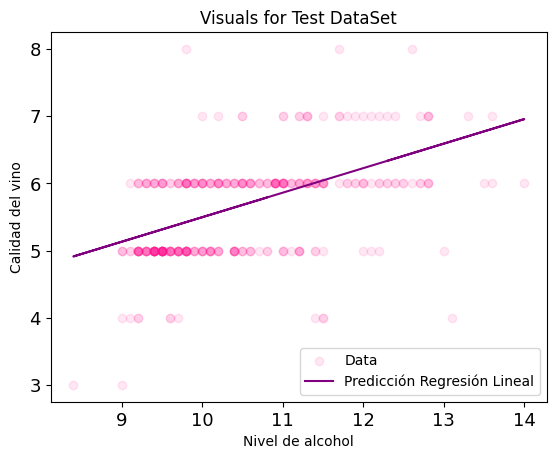

In [ ]:
# Visualizando los Resultados de Validación
plt.scatter(xtest, ytest, color= 'deeppink', label="Data", alpha=.1)
plt.plot(xtest, lr.predict(xtest), color = 'purple', label="Predicción Regresión Lineal")
plt.title("Visuals for Test DataSet")
plt.xlabel("Nivel de alcohol")
plt.ylabel("Calidad del vino")

plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

plt.legend()

plt.show()

### **Ecuación de Regresión Lineal**

In [ ]:
print ("Promedio del Precio en Train Data: {:.2f}".format(ytrain.mean()))
print ("Promedio del Precio en Test Data: {:.2f}".format(ytest.mean()))

print('Intercepto Bo: {:0.3f}'.format(lr.intercept_))
print('Coefficiente B1: {}'.format(lr.coef_))


Promedio del Precio en Train Data: 5.65
Promedio del Precio en Test Data: 5.59
Intercepto Bo: 1.846
Coefficiente B1: [0.36494637]


**Métricas: ¿Cómo saber que es un buen modelo?**

**Root Mean Squared Error (RMSE):(Error cuadratico promedio)** 
Indica que tanto difieren en promedio las predicciones del modelo con respecto a los datos reales


In [ ]:
pred_test = lr.predict(xtest)
pred_train=lr.predict(xtrain)

rmse_test = float(format(np.sqrt(metrics.mean_squared_error(ytest,pred_test)),'.3f'))
rmse_train=float(format(np.sqrt(metrics.mean_squared_error(ytrain,pred_train)),'.3f'))
print('Root Mean Squared Error (RMSE_test): {}'.format(rmse_test))
print('Root Mean Squared Error (RMSE_train): {}'.format(rmse_train))

Root Mean Squared Error (RMSE_test): 0.661
Root Mean Squared Error (RMSE_train): 0.722


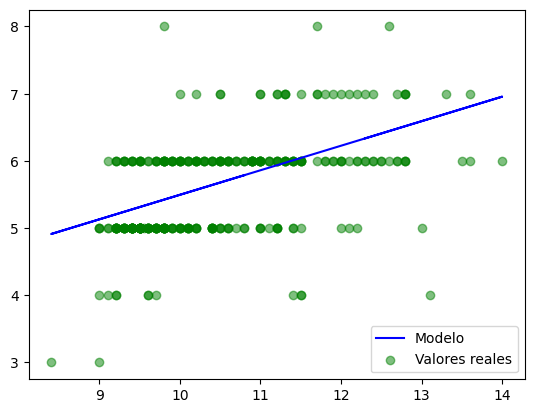

In [ ]:
# RMSE Gráfico
plt.clf()
plt.plot(xtest, pred, color='blue' ,label='Modelo')
plt.scatter(xtest, ytest, c='green', alpha = 0.5, label='Valores reales')

plt.legend()

**R-Squared**

In [ ]:
rtrsm = float(format(lr.score(xtrain, ytrain),'.3f'))
rtesm = float(format(lr.score(xtest, ytest),'.3f'))

print('R-Squared (training): {}'.format(rtrsm))
print('R-Squared (test): {}'.format(rtesm))

R-Squared (training): 0.223
R-Squared (test): 0.238


Sobre el modelo de regresión puedo concluir que a pesar de que la variable que presento mayor correlación con la calidad del vino, fue el nivel de alcohol, al realizar las métricas de RMSE y R-Squared, vemos que el modelo de regresión lineal simple no es un gran modelo para explicar la calidad del vino ,teniendo como variable explicativa al nivel de alcohol ya que la variable explicativa(alcohol)no explica mucho la variabilidad de la calidad del vino, lo que sugiere que el modelo de regresión lineal simple no es muy bueno para explicar la relación entre estas dos variables.

Por otro lado, los valores de RMSE son relativamente bajos tanto para los datos de entrenamiento (0.722) como para los datos de prueba (0.661), lo que sugiere que el modelo tiene una buena capacidad de predicción. Esto indica que el modelo de regresión lineal simple tiene un buen ajuste a los datos y que las predicciones realizadas por el modelo son precisas en general.

Y armando nuestra ecuación de regresión lineal tendriamos:

Calidad del vino= 1.846 + 0.36494637*nivel_alcohol + e

donde se puede interpretar que por cada nivel adicional de alcohol, se espera que la calidad del vino aumente 0.36 en promedio